# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.shape

(1781, 21)

In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

What the dataset looks like?
When we print the head of the dataset and also the shape, we can see that it has 1781 rows and 21 columns, or features. It explains some information about websites: As the name of the server, the URL, which is the lenght of the content, the country, and so on. 

What are the data types?
The 21 features we have are of three different types right now:
    - Object (they contain strings)
    - int64 (they are integers as the url lenght)
    - float64 
Which columns contain the features of the websites?

    URL_LENGTH                       
    NUMBER_SPECIAL_CHARACTERS        
    CHARSET                          
    SERVER                           
    CONTENT_LENGTH              
    WHOIS_COUNTRY                    
    WHOIS_STATEPRO                
    WHOIS_REGDATE                 
    WHOIS_UPDATED_DATE            
    TCP_CONVERSATION_EXCHANGE      
    DIST_REMOTE_TCP_PORT          
    REMOTE_IPS                    
    APP_BYTES                     
    SOURCE_APP_PACKETS             
    REMOTE_APP_PACKETS             
    SOURCE_APP_BYTES               
    REMOTE_APP_BYTES               
    APP_PACKETS                    
    DNS_QUERY_TIMES              
    
*Which column contains the feature we will predict?*

The column that predicts if a website is benign or malign is the Type one, since it is categorized between 0 and 1 and it is the only one that is categorized like this. 

*What is the code standing for benign vs malicious websites?*
To answer this question we need to use a value counts. The feeling we have here is that we will have much more benign website than malign ones. 

In [6]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

According to our hypotheses, we can say The code standing of benign is 0 and the code standing for malign websites is 1. 


*Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?*

Yes, there are some columns that are right now considered as *objects* and that should be transformed into datetime. 

    WHOIS_REGDATE                 
    WHOIS_UPDATED_DATE  

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [7]:
# First of all we select the columns that are numeric and we create a new dataframe with these columns. 
#websites.select_dtypes(include=[np.number])

In [8]:
websites.select_dtypes(include=[np.number]).head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


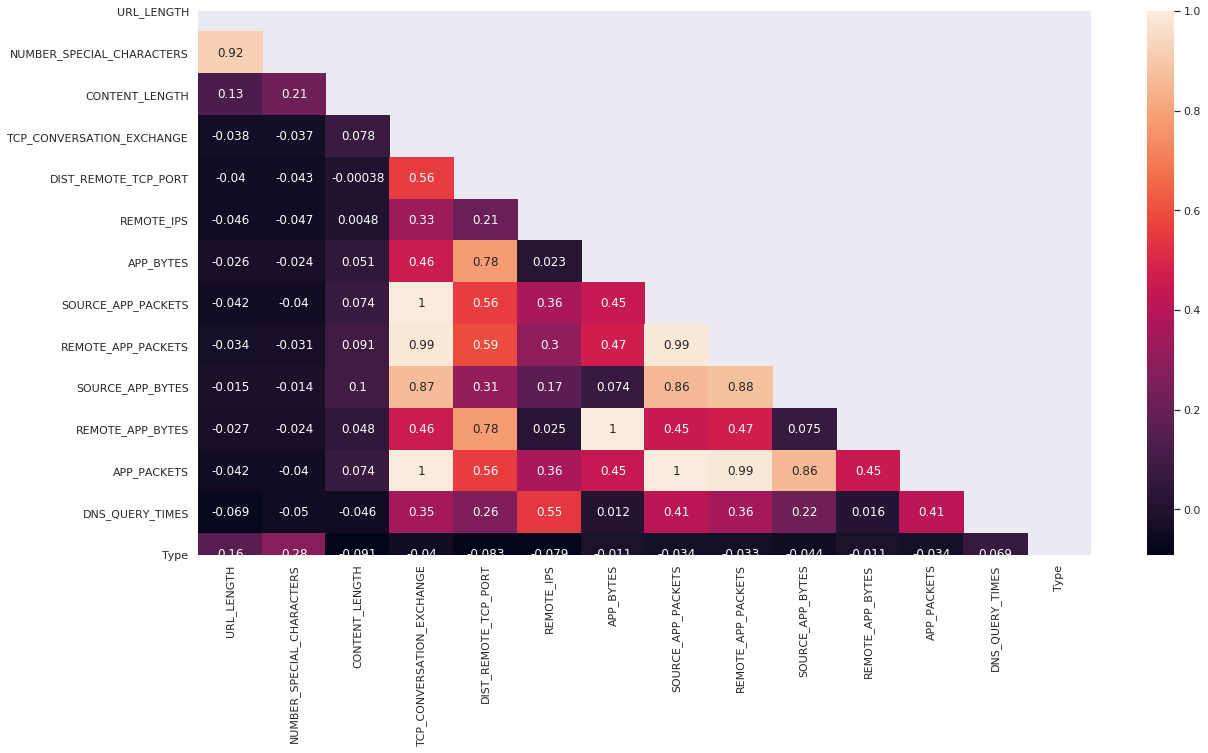

In [9]:
# We define the correlation matrix and we plot the heatmap.

sns.set(rc={'figure.figsize':(20,10)})

mask = np.zeros_like(websites.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))

sns.heatmap(websites.corr(), annot=True, mask= mask)
plt.show()


From this graph we can see that the lighter the color is, the strongest the correlation between variables. We consider as a threshold for being extremely correlated values above 90%. 

For example, we can see in this graph that the correlated variable are: 

    - SOURCE_APP_PACKETS (1)
    - REMOTE_APP_BYTES (1)
    - APP_PACKETS (1)
    - REMOTE_APP_PACKETS (0.99)
    - NUMBER_SPECIAL_CHARACTERS (0.92)

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [10]:
# We extract removing the column SOURCE_APP_PACKETS (1)

websites.drop('SOURCE_APP_PACKETS', inplace=True, axis=1)

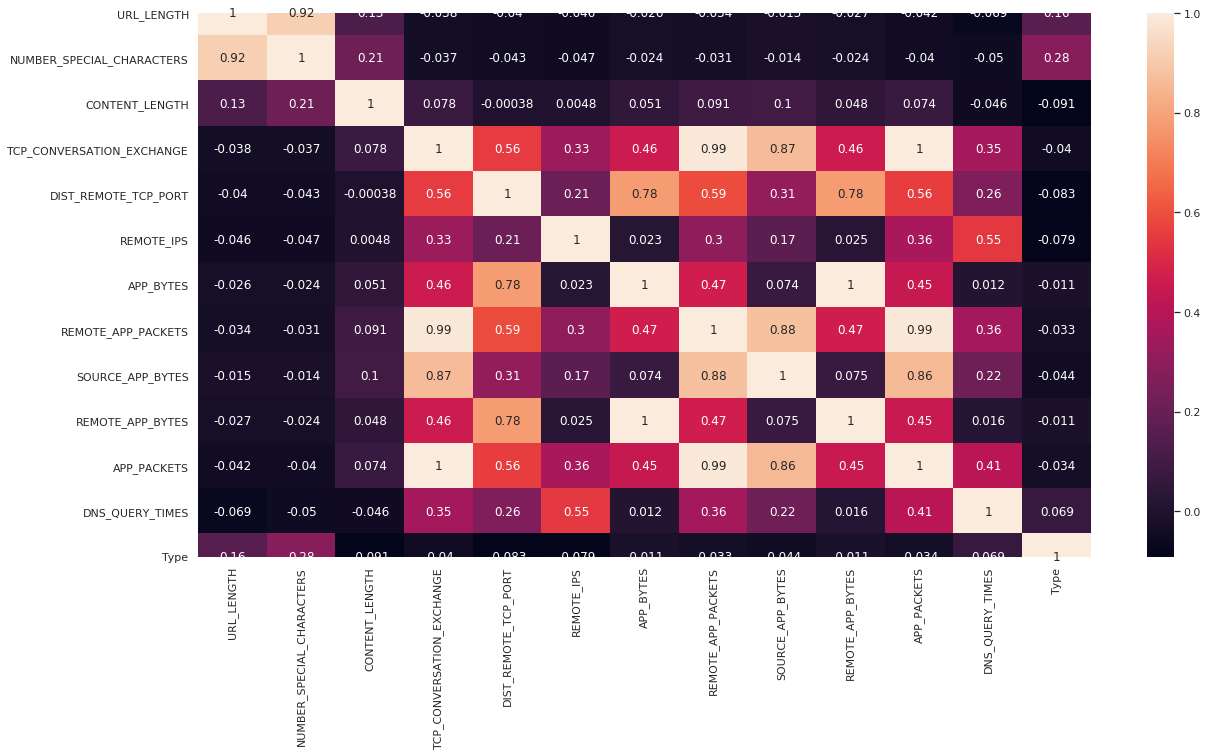

In [11]:
sns.heatmap(websites.corr(), annot=True)

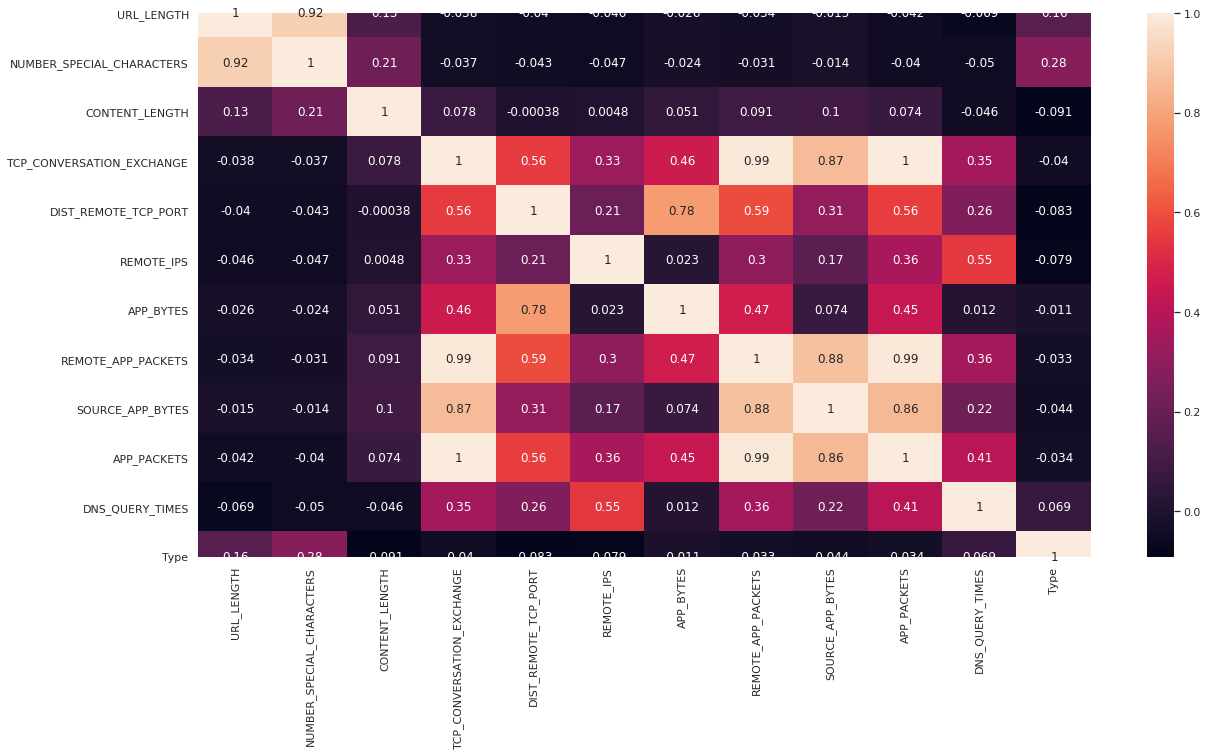

In [12]:
# We still have correlation values that are greater than 90%. We continue droping values out. 
# Now we drop the column "REMOTE_APP_BYTES"

websites.drop('REMOTE_APP_BYTES', inplace=True, axis=1)
sns.heatmap(websites.corr(), annot=True)

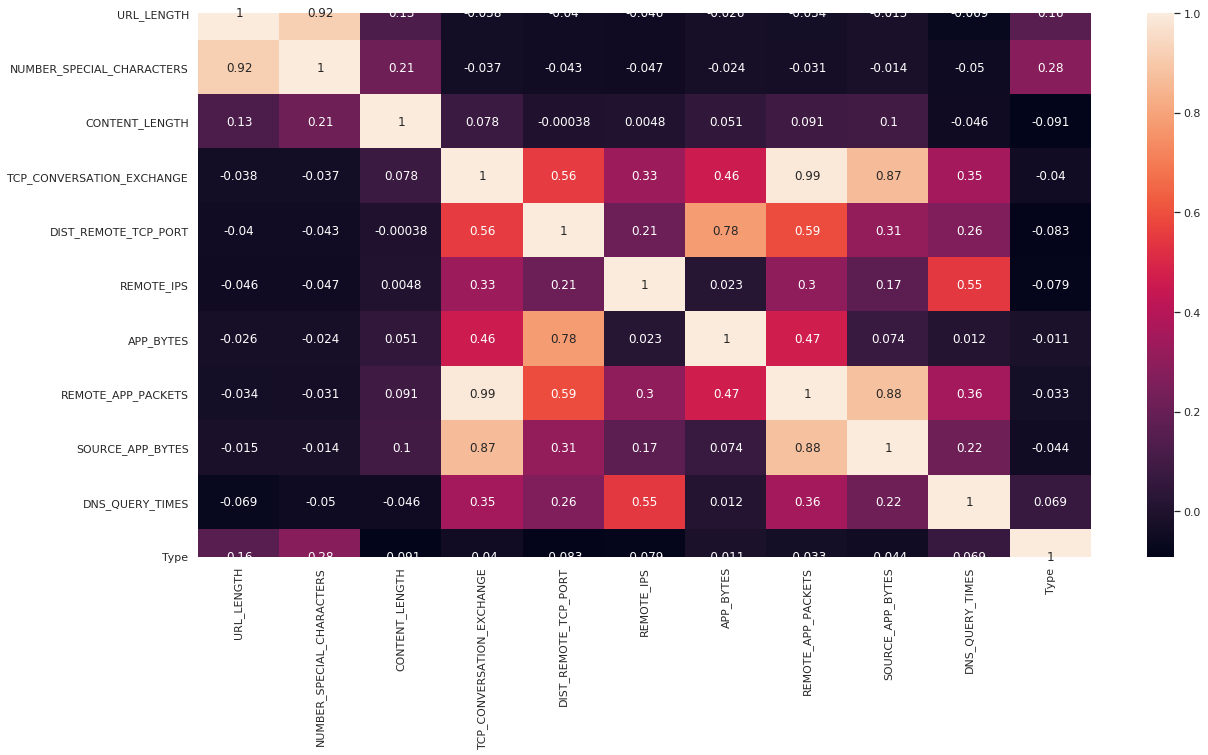

In [13]:
# As we still have values above 90%, we drop the next element in our prioritization list
# Next column to drop: 'APP_PACKETS'

websites.drop('APP_PACKETS', inplace=True, axis=1)
sns.heatmap(websites.corr(), annot=True)


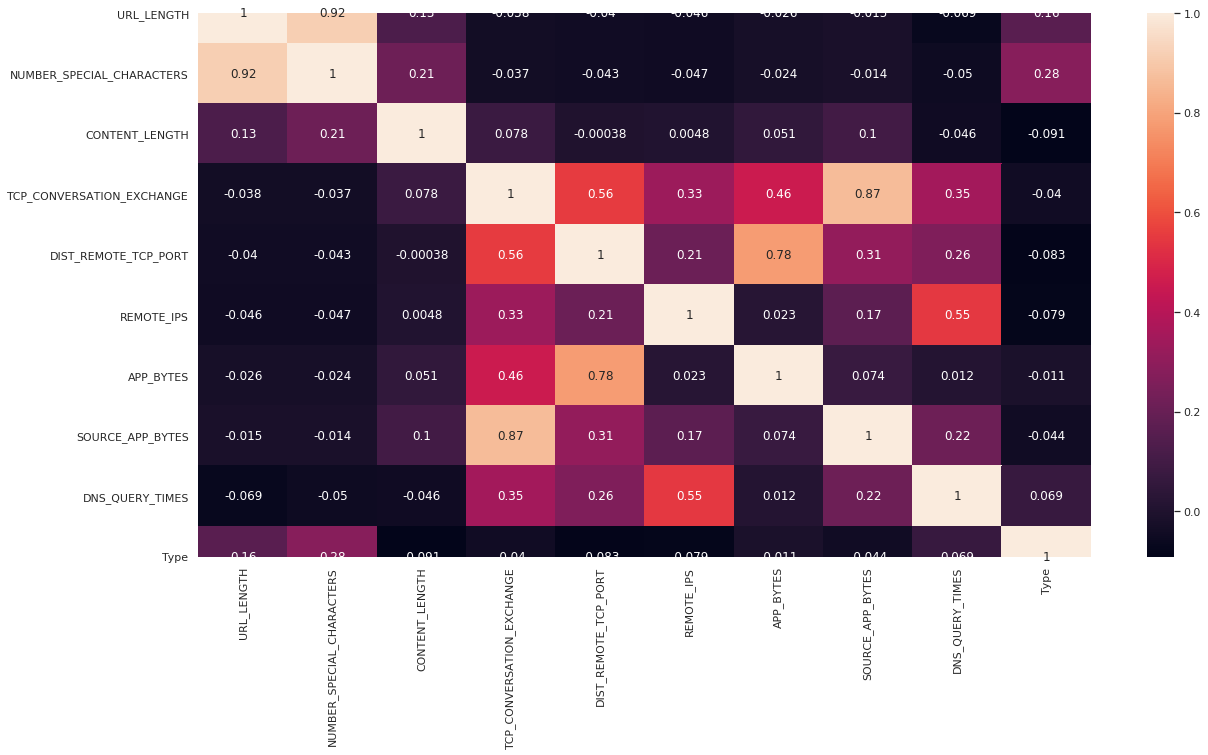

In [14]:
# As we still have values that are extremely correlated
# We drop the next column in our list: 'REMOTE_APP_PACKETS'

websites.drop('REMOTE_APP_PACKETS', inplace=True, axis=1)
sns.heatmap(websites.corr(), annot=True)

There's only one variable that is correlated with a value above than 90%, that is "NUMBER_SPECIAL_CHARACTERS"

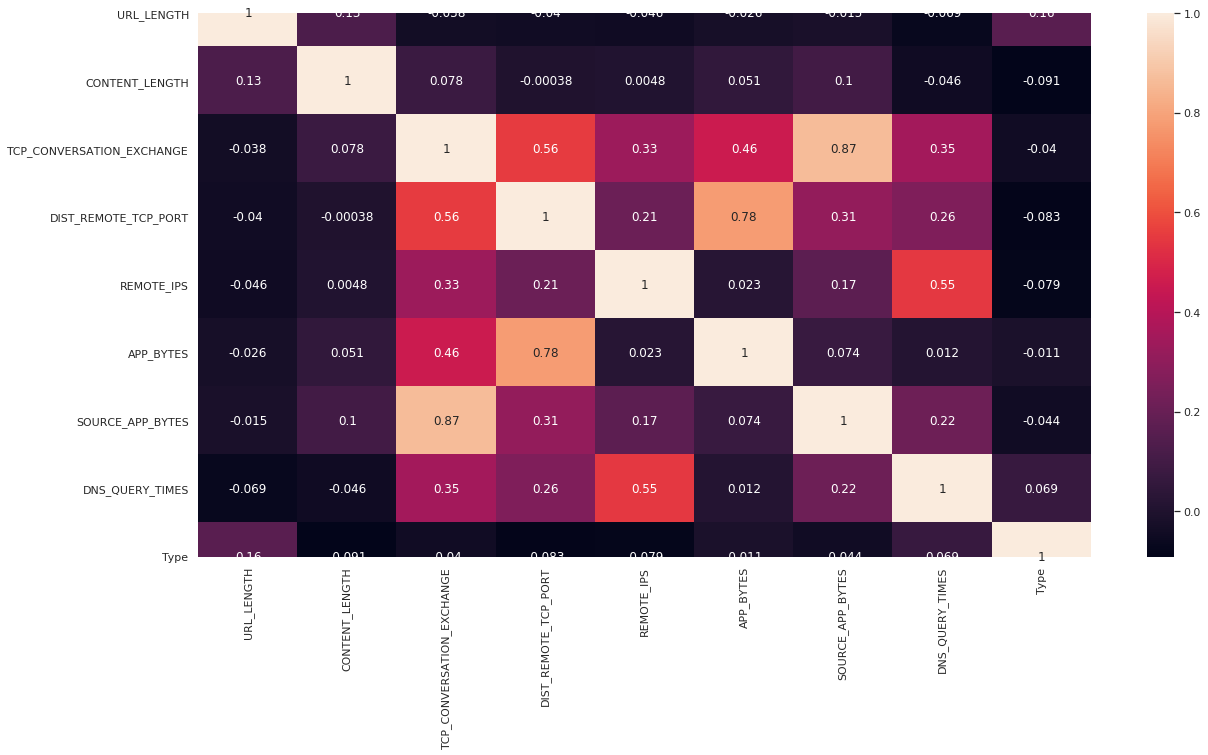

In [15]:
# As we still have values that are extremely correlated
# We drop the next column in our list: 'NUMBER_SPECIAL_CHARACTERS'

websites.drop('NUMBER_SPECIAL_CHARACTERS', inplace=True, axis=1)
sns.heatmap(websites.corr(), annot=True)

What we can see from the heatmap above, we have achieved a final version of our numerical variables in our website dataset. We no longer have variables that are extremely correlated. 

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [16]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

What we can see from the cell above is that we have a column wit a lot of missing values, that is `CONTENT_LENGTH`, with 812 missing values. Furthermore, there's also another column that has missing values, that is `DNS_QUERY_TIMES`. However, in this case we only have one missing value. Hence, after droping out the column `CONTENT_LENGTH`, we will drop the row with a missing value. 

In [17]:
# We drop the column 'CONTENT_LENGTH'
websites.drop('CONTENT_LENGTH', axis=1, inplace=True)

In [18]:
# We check how many NaN we have after droping 'CONTENT_LENGTH'
websites.isna().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [19]:
websites.dropna(inplace=True)

In [20]:
# We check how many NaN we have after droping the rows with  NaNs.
websites.isna().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [21]:
# We check how many NaNs we have again 
websites.isna().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [22]:
websites['WHOIS_COUNTRY'].unique()


array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [23]:
websites['WHOIS_COUNTRY'].value_counts()


US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
CN                  10
UK                  10
CZ                   9
FR                   9
CH                   6
NL                   6
KR                   5
[u'GB'; u'UK']       5
PH                   4
AT                   4
BS                   4
ru                   4
BE                   3
TR                   3
KY                   3
HK                   3
us                   3
SE                   3
SC                   3
DE                   3
KG                   2
UY                   2
NO                   2
IL                   2
Cyprus               2
UA                   2
SI                   2
RU                   2
BR                   2
AE                   1
UG                   1
TH                   1
LV                   1
IE                   1
PK         

There are some values of this columns that are not correct. Names as: 

    'se'
    '[u'GB'; u'UK']'
    'ru'
    'United Kingdom'
    'Cyprus'

We will change the names into the country code based on two capital letters.

In [24]:
# Creating a dictionary to change the country codes to a correct code.
labels ={"[u'GB'; u'UK']":'UK', 'se':'SE', 'ru':'RU', 'United Kingdom':'UK', 'Cyprus':'CY' }

# We replace the incorrect codes with the correct ones. 
websites.replace(labels, inplace=True)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<BarContainer object of 45 artists>

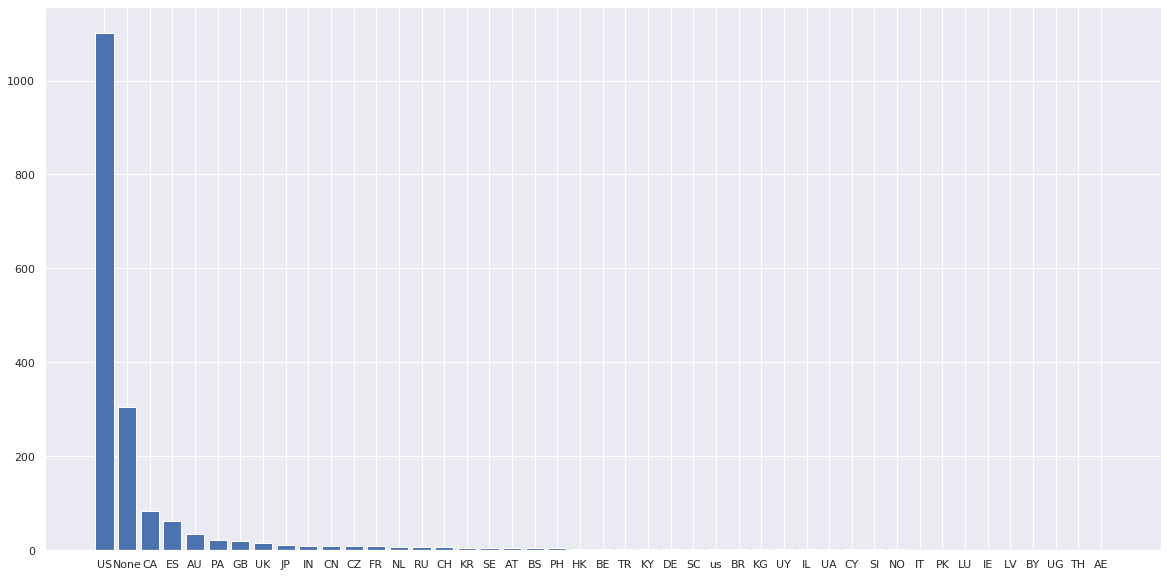

In [25]:
plt.bar(x= websites['WHOIS_COUNTRY'].value_counts().index, height=websites['WHOIS_COUNTRY'].value_counts())

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [26]:
#websites['WHOIS_COUNTRY'].value_counts()[:10]

others_lst = websites['WHOIS_COUNTRY'].value_counts()[10:].index

websites.replace(to_replace=others_lst, value='Others', inplace=True)
    

In [27]:
websites['WHOIS_COUNTRY'].value_counts()

US        1102
None       306
Others     113
CA          83
ES          63
AU          35
PA          21
GB          19
UK          16
JP          11
IN          10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [28]:
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [29]:
websites.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,7,0,2,700,1153,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,17,7,4,1230,1265,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,31,22,3,3812,18784,8.0,0
4,B0_403,17,UTF-8,None,US,57,2,5,4278,129889,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [30]:
# Your code here

websites.dtypes


URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [31]:
websites.drop(['URL'], axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
websites['CHARSET'].value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [33]:
websites.isna().sum()

URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [34]:
websites['SERVER'].value_counts()


Apache                                                                                                   385
nginx                                                                                                    211
None                                                                                                     175
Microsoft-HTTPAPI/2.0                                                                                    113
cloudflare-nginx                                                                                          94
Microsoft-IIS/7.5                                                                                         51
GSE                                                                                                       49
Server                                                                                                    49
YouTubeFrontEnd                                                                                           42
nginx/1.12.0       

![Think Hard](../images/think-hard.jpg)

We could try to replace some labels for a higher level label, such as `Apache`, `Microsoft`, `Nginx`, and others. 


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [35]:
def convert_string(s): 
    if "Microsoft" in s: 
        return "Microsoft"
    elif "Apache" in s: 
        return "Apache"
    elif "nginx" in s: 
        return "nginx"
    else:
        return "Other"

In [36]:
convert_string('Microsoft ewlkrjwlkerjlwe')

'Microsoft'

In [37]:
convert_string('1121')

'Other'

In [38]:
websites['SERVER'] = websites['SERVER'].apply(convert_string)

In [39]:
websites.SERVER= websites.SERVER.apply(convert_string)

In [40]:
type(websites['SERVER'][1])

str

In [54]:
websites['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [42]:
# Your code here


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [43]:
# Your code here


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [44]:
from sklearn.model_selection import train_test_split

# Your code here:


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [45]:
# Your code here:



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [46]:
# Your code here:



finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [47]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [48]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [49]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [50]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [51]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [52]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [53]:
# Your code here